## COVID-19
### Germany
#### Data source:
http://www.nexolin.de/data/covid-19/rki/rki_data.csv based on
https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Fallzahlen.html

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [94]:
df_rki = pd.read_csv("http://www.nexolin.de/data/covid-19/rki/rki_data.csv", parse_dates=['date'])
df_rki.dtypes

Bundesland            object
date          datetime64[ns]
confirmed              int64
deaths                 int64
dtype: object

In [95]:
df_rki['days'] = df_rki.groupby('Bundesland').cumcount() + 1
df_rki = df_rki.set_index(['Bundesland','date'])
df_rki

confirmed  deaths  days
Bundesland        date                               
Baden-Württemberg 2020-02-29         14       0     1
                  2020-03-01         15       0     2
                  2020-03-02         19       0     3
                  2020-03-03         28       0     4
                  2020-03-04         50       0     5
...                                 ...     ...   ...
Thüringen         2020-03-11         10       0     9
                  2020-03-12         14       0    10
                  2020-03-13         29       0    11
                  2020-03-14         46       0    12
                  2020-03-15         51       0    13

[227 rows x 3 columns]

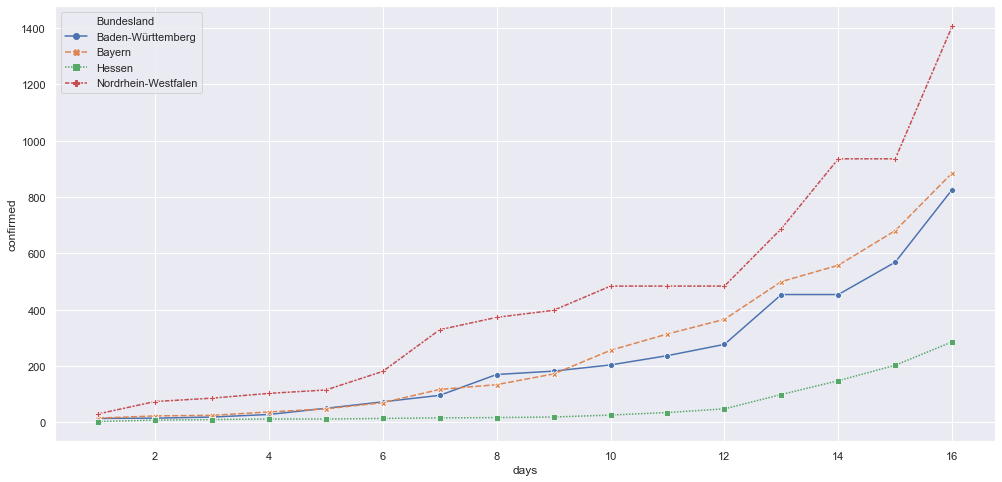

In [118]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
df_plot_data = df_rki.loc[['Nordrhein-Westfalen', 'Bayern','Baden-Württemberg','Hessen']].reset_index()
sns.lineplot(data = df_plot_data, y='confirmed', x='days', hue='Bundesland', style='Bundesland',markers=True)


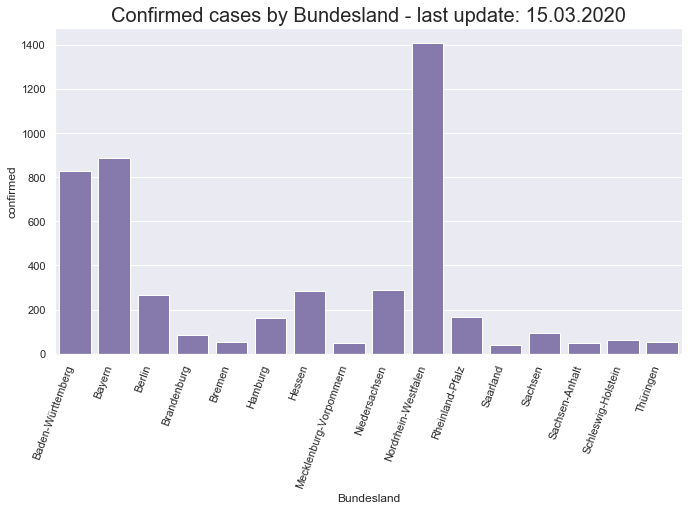

In [115]:
df_plot_data = df_rki.loc[pd.IndexSlice[:,df_rki.reset_index().date.max()],:].reset_index()
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax = sns.barplot(data=df_plot_data, x='Bundesland', y='confirmed', color='C4')
_ = ax.set_xticklabels(ax.get_xticklabels(),rotation=70, ha='right')
_ = ax.set_title('Confirmed cases by Bundesland - last update: {}'.format(df_rki.reset_index().date.max().strftime('%d.%m.%Y')), fontsize=20)

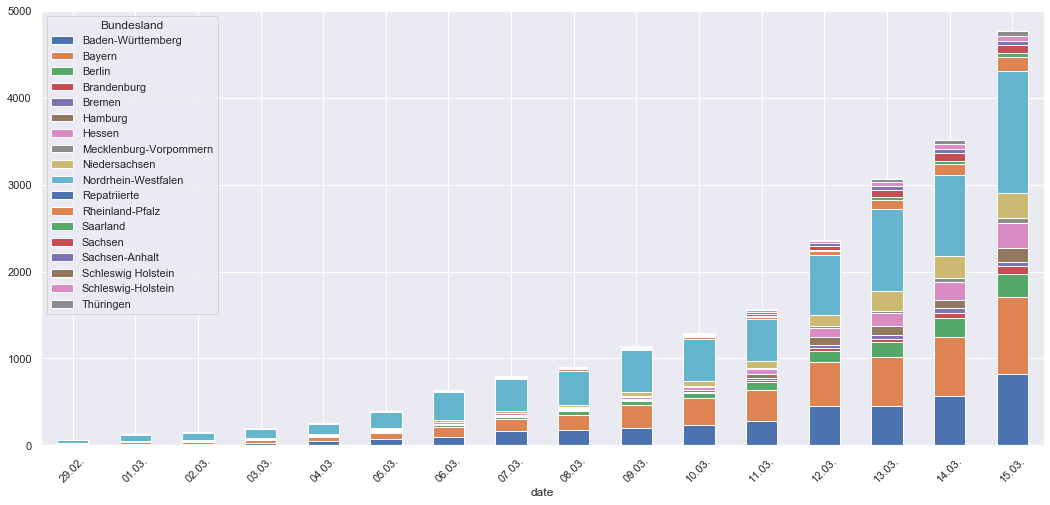

In [144]:
df_plot_data = df_rki.unstack(level=0).loc[:, pd.IndexSlice['confirmed',:]]
df_plot_data.columns = df_plot_data.columns.droplevel()
ax = df_plot_data.plot(kind='bar', stacked=True, figsize=(16,8))
xticks = [tick.strftime('%d.%m.') for tick in df_plot_data.index]
_ = ax.set_xticklabels(xticks,rotation=45, ha='center')
